In [1]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
# Mengunggah file CSV dari komputer Anda
upload_files = files.upload()

Saving data0-SZL.csv to data0-SZL.csv


In [3]:
# Membaca file CSV yang diunggah
for filename in upload_files.keys():
    data = pd.read_csv(io.StringIO(upload_files[filename].decode('utf-8')))

In [4]:

# Menampilkan lima baris pertama dari data
print(data.head())

   953  915  989  957  942  945  964  967  951  958  ...  999.2  1008  999.3  \
0  951  927  984  961  943  948  965  974  952  960  ...   1002  1002   1011   
1  949  934  981  961  943  945  966  971  954  962  ...   1006   999   1016   
2  948  936  981  960  944  943  964  973  955  961  ...   1009   999   1012   
3  950  935  983  960  948  944  960  970  953  960  ...   1009   999   1008   
4  950  938  987  961  954  946  963  965  951  958  ...   1007   999   1010   

   1024  931  831  962.5  919  1211  952.1  
0  1030  935  830    965  914  1204    950  
1  1033  937  832    965  913  1175    947  
2  1033  937  827    967  913  1134    947  
3  1032  934  825    966  916  1084    949  
4  1032  931  822    965  917  1039    949  

[5 rows x 160 columns]


In [5]:
# Menampilkan ukuran data (jumlah baris dan kolom)
print("Ukuran Data:", data.shape)

Ukuran Data: (3599, 160)


In [6]:
for column in data.columns:
    # Rata-rata
    data[column+'_mean'] = data[column].mean()
    # Standar deviasi
    data[column+'_std'] = data[column].std()
    # Skewness
    data[column+'_skew'] = data[column].skew()
    # Median
    data[column+'_median'] = data[column].median()
    # Energi
    data[column+'_energy'] = sum(data[column]**2)
    # Minimum
    data[column+'_min'] = data[column].min()
    # Maximum
    data[column+'_max'] = data[column].max()

<ipython-input-6-210b0c14fc33>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[column+'_std'] = data[column].std()
<ipython-input-6-210b0c14fc33>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[column+'_skew'] = data[column].skew()
<ipython-input-6-210b0c14fc33>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [16]:
# Memilih 6 kolom secara bebas
selected_columns = ['_max', '_std', '_skew', '_median', '_energy', '_min']

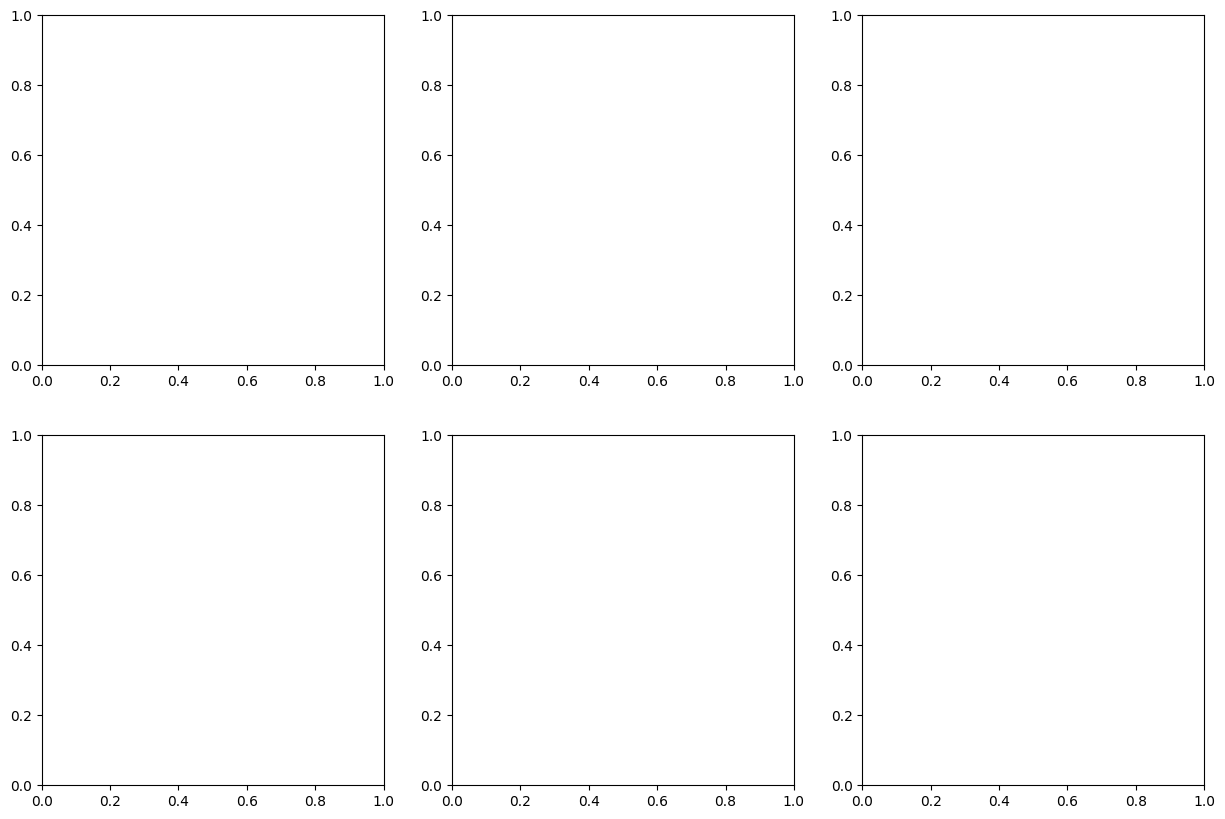

In [17]:
# Membuat multiplot 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

In [18]:
# Menggambar plot untuk setiap kolom yang dipilih
for i, column in enumerate(selected_columns):
    row = i // 3
    col = i % 3
    axes[row, col].set_title(column)

In [19]:
for i in range(len(selected_columns), 2*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

In [22]:
# Menampilkan plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [23]:
# Memilih 10 kolom secara berurutan untuk setiap kelompok warna
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

In [24]:
# Inisialisasi penanda dan warna
markers = ['*', 'o', 'v', '^', 's', 'D', 'X', 'P', '>', '<']
marker_index = 0


In [25]:
# Inisialisasi plot
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

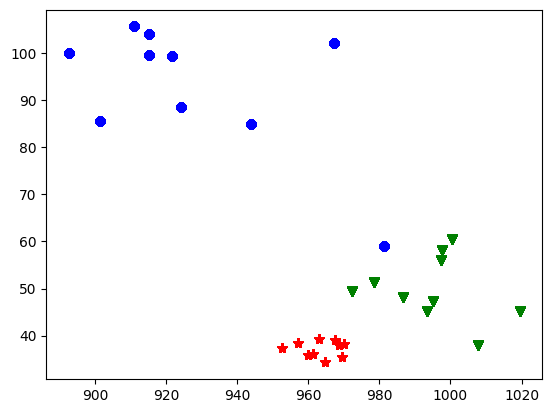

In [26]:
# Membuat scatterplot untuk setiap kelompok warna
for i in range(0, 30, 10):
    selected_columns = data.columns[i:i+10]
    color = colors[i // 10]
    marker = markers[marker_index]
    marker_index += 1
    for column in selected_columns:
        plt.scatter(data[column+'_mean'], data[column+'_std'], color=color, marker=marker, label=f'Columns {i+1}-{i+10}')

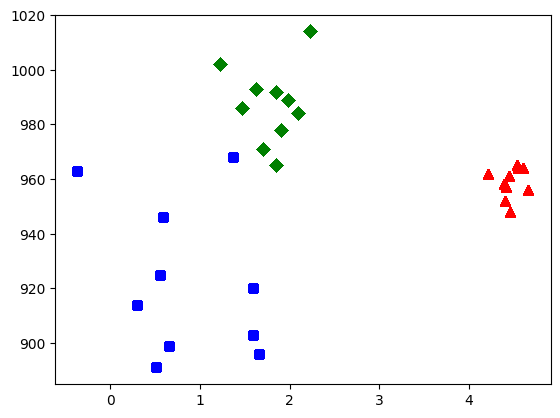

In [27]:
for i in range(0, 30, 10):
    selected_columns = data.columns[i:i+10]
    color = colors[i // 10]
    marker = markers[marker_index]
    marker_index += 1
    for column in selected_columns:
        plt.scatter(data[column+'_skew'], data[column+'_median'], color=color, marker=marker, label=f'Columns {i+1}-{i+10}')